# Descriptive Analysis 

In [1]:
import pandas as pd
import numpy as np
import os

#import seaborn.base
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
##set a working directory
user = os.path.expanduser('~')
display(user)
os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/')

'/Users/NatStrom'

In [3]:
data_analysis = pd.read_csv('data_final.csv')

In [4]:
data_analysis

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,tot_affect,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
1,1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
2,2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
3,3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
4,4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,1007.0,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25734,25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25735,25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
25736,25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,270186.0,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0


In [ ]:
data_analysis = data_analysis.drop(columns={'Unnamed: 0'})

In [ ]:
print(data_analysis.dtypes)
print(data_analysis.columns)
print(data_analysis.describe(include='all'))

## sanity check to ensure the spread of the data is correct
print('sanity check 1, ensure appropriate years and countries are represented')
list_country=list(list(data_analysis['iso'].drop_duplicates()))
list_year=list(list(data_analysis['year_id'].drop_duplicates()))
print('country list', list_country)
print('year list', list_year)
#inspect for NAs
print('following checks for completeness of all columns')
print(data_analysis['iso'].isnull().values.any())
print(data_analysis['year_id'].isnull().values.any())
print(data_analysis['ihme_healthworkers_all_mean'].isnull().values.any())
print(data_analysis['best_log'].isnull().values.any())
print(data_analysis['daly_all'].isnull().values.any())
print(data_analysis['age0014_value'].isnull().values.any())
print(data_analysis['gdp_pcap_value'].isnull().values.any())
print(data_analysis['xpd_gdp_value'].isnull().values.any())
print(data_analysis['dah_total_log'].isnull().values.any())
print(data_analysis['access_drinkwater_index'].isnull().values.any())
print(data_analysis['access_sani_index'].isnull().values.any())

In [ ]:
data_analysis.info()

## dependent variable

In [ ]:
print(data_analysis['daly_all'].describe())
print(data_analysis['daly_all'].info())
#standard deviation should not be 0, that would mean it does not change over time

In [ ]:
def nullcounts(ser):
    return ser.isnull().sum()

def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max'],
                    numeric_only=False, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)

custom_describe(data_analysis['daly_all'])
data_analysis['daly_all'].describe()

In [ ]:
#time trend of the data
grouped = data_analysis.groupby(['iso', 'year_id']).agg({'daly_all': 'sum'})
top_donors = grouped.groupby('iso').agg({'daly_all': 'sum'}).nlargest(10, 'daly_all').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_donors)]

# Pivot the data to create a column for each donor and a row for each year
pivoted = filtered.reset_index().pivot(index='year_id', columns='iso', values='daly_all')
pivoted.plot.area(stacked=True)

plt.title('Development of DALY in top 10 countries over time')
plt.xlabel('Year')
plt.ylabel('Rate of DALY')
plt.savefig('timetrend_daly.png')
# Show the plot
plt.show()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'])
plt.title('Distribution of the DV – DALY attributable to unsafe acceess to WASH')
plt.savefig('daly_all_hist.png')

In [ ]:
#test for skweness
import scipy
#from scipy.stats import skewtest
#scipy.stats.skewtest(data_analysis['daly_all'], axis=0, nan_policy='omit', alternative='two-sided')

In [ ]:
#test for outliers
## see data_analysis.daly_all.describe() or the boxplots
### clear indication that there are outliers - now use statistical tests

In [ ]:
#test for missingness
values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

## generally 29% missingness, which is strange since it sshould be complete, its estimates

In [ ]:
#what to do with missing data? balanced/ unbalanced panel?


In [ ]:
#time trend of the data
sns.lineplot(x='year_id',y='daly_all',data=data_analysis)
plt.title('Timetrend of the DV – DALY sttributable to unsafe acceess to WASH')
plt.savefig('daly_all_timetrend.png')

In [ ]:
#judging from the descriptive analysis, need there be any transformations?
##no

## independent variable

binary conflict variable

In [ ]:
data_analysis['dummy_conflict'].describe()

In [ ]:
data_analysis['dummy_conflict_hightreshold'].describe()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['dummy_conflict'],kde = True)
plt.title('Distribution of binary conflict predictor')
plt.savefig('dummy_conflict_hist.png')

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['dummy_conflict'],kde = True)
plt.title('Distribution of binary conflict predictor with high treshold')
plt.savefig('dummy_conflict_hist_hightreshoold.png')

best_log fatalities

In [ ]:
data_analysis['best_log'].describe()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['best_log'],kde = True)
plt.title('Distribution of log-transformed conflict predictor')
plt.savefig('best_hist.png')

#what does the distribution say? --> log transform the variable

In [ ]:
#time trend of the data
grouped = data_analysis.groupby(['iso', 'year_id']).agg({'best_log': 'sum'})
top_donors = grouped.groupby('iso').agg({'best_log': 'sum'}).nlargest(10, 'best_log').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_donors)]

# Pivot the data to create a column for each donor and a row for each year
pivoted = filtered.reset_index().pivot(index='year_id', columns='iso', values='best_log')
pivoted.plot.area(stacked=True)

plt.title('Development of conflict fatalities in top 10 countries over time')
plt.xlabel('Year')
plt.ylabel('Conflict fatalities logp1')
plt.savefig('timetrend_conflict.png')

# Show the plot
plt.show()

In [ ]:
##inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)

In [ ]:

sns.lineplot(x='year_id' ,y='dummy_conflict',data=data_analysis)
plt.title('Trendline of binary conflict predictor')
plt.savefig('conflict_trend.png')

In [ ]:

sns.lineplot(x='year_id' ,y='dummy_conflict_hightreshold',data=data_analysis)
plt.title('Trendline of binary conflict predictor with high treshold')
plt.savefig('conflict_trend_hightreshold.png')

In [ ]:

sns.lineplot(x='year_id' ,y='best_log',data=data_analysis)
plt.title('Trendline of log-tansformed conflict predictor')
plt.savefig('conflict_trend_log.png')

In [ ]:
#compare logtransformed with non logtransfomed variables

sns.histplot(data_analysis['best_log'],kde=True)

plt.savefig('conflict_log.png')

In [ ]:
#inspect the conflict lags
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_analysis['lag_best_5'],ax=axes[0])
sns.histplot(data_analysis['lag_best_10'],ax=axes[1])
sns.histplot(data_analysis['lag_best_20'],ax=axes[1])

plt.savefig('conflict_lag.png')

dummy type of conflict

In [ ]:
data_analysis[['dummy_sb','dummy_os','dummy_ns']].describe()

In [ ]:
sns.histplot(data_analysis['dummy_os'],kde=True)
plt.title('Distribution of one-sided violence')
plt.savefig('conflictos.png')

In [ ]:
sns.histplot(data_analysis['dummy_sb'],kde=True)
plt.title('Distribution of state-based violence')
plt.savefig('conflict_sb.png')

In [ ]:
#inspect the conflict lags
sns.histplot(data_analysis['dummy_ns'],kde=True)
plt.title('Distribution of non-state violence')
plt.savefig('conflict_ns.png')

dummy neighboring country in conflict

In [ ]:
data_analysis['dummy_neighbor'].describe()

In [ ]:
data_analysis['dummy_neighbor_hightreshold'].describe()

In [ ]:
sns.histplot(data_analysis['dummy_neighbor'],kde=True)
plt.title('Distribution of variable indicating neighboring conflict')
plt.savefig('conflict_neighbor.png')

In [ ]:
sns.histplot(data_analysis['dummy_neighbor_hightreshold'],kde=True)
plt.title('Distribution of variable indicating neighboring conflict with high treshold')
plt.savefig('conflict_neighbor_hightreshold.png')

## controls package standard

In [ ]:
#get descriptives
print(data_analysis['gdp_log'].describe())
print(data_analysis['age0014_value'].describe())
print(data_analysis['xpd_gdp_value'].describe())
# all variables vary over time, the std is not zero

In [ ]:
sns.histplot(data_analysis['gdp_log'],kde=True)
plt.title('Distribution of GDP, log-transformed')
plt.savefig('gdp_hist.png')

In [ ]:
sns.histplot(data_analysis['age0014_value'],kde=True)
plt.title('Distribution of population % aged between 0 and 14 years')
plt.savefig('age0014_hist.png')

In [ ]:
#produce distribution plot
sns.histplot(data_analysis['xpd_gdp_value'],kde=True)
plt.title('Distribution of government expenditure as % of GDP')
plt.savefig('gov_expense_hist.png')

#gdp has already been logtransformed

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

In [ ]:
data_analysis.to_csv('data_analysis.csv')

## controls package health

In [ ]:
#get descriptives
display(data_analysis['ihme_healthworkers_all_mean'].describe())
display(data_analysis['dah_total_log'].describe())
#all varables vary over time, the std is not 0

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['dah_total_log'],kde = True)
plt.title('Distribution of development aid attributed to health')
plt.savefig('dah_hist.png')
##dah has already been log transformed

In [18]:
data_analysis['healthworker_all_log'] = np.log(data_analysis['ihme_healthworkers_all_mean'])
display(data_analysis)

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn,death_tot_log,healthworker_all_log
0,0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000,3.390238
1,1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000,3.390238
2,2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000,3.390238
3,3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000,3.390238
4,4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000,3.390238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635,3.872783
25734,25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635,3.872783
25735,25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635,3.872783
25736,25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635,3.872783


In [ ]:
#logtransform the health worker density
import seaborn as sns
data_analysis['healthworker_all_log'] = np.log(data_analysis['ihme_healthworkers_all_mean'])
display(data_analysis)

figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_analysis['ihme_healthworkers_all_mean'],ax=axes[0])
sns.histplot(data_analysis['healthworker_all_log'],ax=axes[1])

plt.savefig('healthworker_log.png')

In [ ]:
#produce distribution plot
sns.histplot(data_analysis['healthworker_all_log'],kde = True)
plt.title('Distribution of health worker density')
plt.savefig('healthworker_hist.png')
##dah has already been log transformed

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

## controls package disaster

In [ ]:
#get descriptives
display(data_analysis['access_drinkwater_index'].describe())
display(data_analysis['access_sani_index'].describe())
display(data_analysis['death_tot'].describe())
display(data_analysis['gdis_count_lag'].describe())

In [ ]:
sns.histplot(data_analysis['access_drinkwater_index'],kde = True)
plt.title('Distribution of population with access to safe drinkwater')
plt.savefig('water_index_hist.png')

In [ ]:
sns.histplot(data_analysis['access_sani_index'],kde = True)
plt.title('Distribution of population with access to sanitation')
plt.savefig('sani_index_hist.png')

In [5]:
#logtransform the wdi_gdp variable
data_analysis['death_tot_log'] = np.log1p(data_analysis['death_tot'])
data_analysis

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,pg_id,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn,death_tot_log
0,0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000
1,1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000
2,2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000
3,3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000
4,4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,48689148,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25733,25733,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635
25734,25734,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635
25735,25735,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635
25736,25736,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,13811629,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0,6.484635


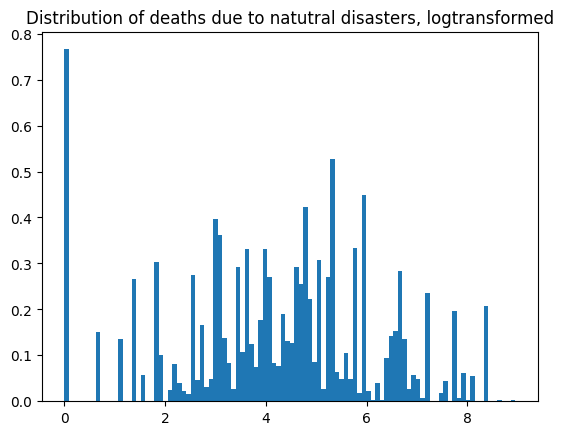

In [13]:
plt.hist(data_analysis['death_tot_log'], bins=100, density= True)
plt.title('Distribution of deaths due to natutral disasters, logtransformed')
plt.savefig('death_emdat_hist.png')

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['gdis_count_lag'],kde = True)
plt.title('Distribution of disaster event counts, log-transformed')
plt.savefig('disaster_event_hist.png')

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

In [ ]:
data_analysis['access_sani_index'].describe()

# Start the statistical analysis in python

In [ ]:
import statsmodels

In [ ]:
## simple regression plot with line of best fit between two variables
plot3 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=False,fit_reg=True)

In [ ]:
## simple regression plot with line of best fit between two variables
plot2 = sns.regplot(x='dummy_conflict',y='daly_all',data= data_analysis,scatter=False,fit_reg=True)

In [ ]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=True,fit_reg=False)

In [ ]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='dummy_conflict_hightreshold',y='daly_all',data= data_analysis,scatter=True,fit_reg=False)

In [ ]:
#plot of daly_all across all countries and years against the number of fatalities
 
sns.scatterplot(x=data_analysis['daly_all'], 
                y=data_analysis['best_log']).set(title='Y-o-Y % Change in daly versus Y-o-Y % Change in fatalities')

In [14]:
data = data_analysis.copy()

In [ ]:
data.columns

In [ ]:
#define datasets with the different types of conflict
data_sb = data.loc[data['type_of_violence'] == 'sb']
display(data_sb)

data_ns = data.loc[data['type_of_violence'] == 'ns']
display(data_ns)

data_os = data.loc[data['type_of_violence'] == 'os']
display(data_os)

# base model using the binary conflict indicator

In [ ]:
import scipy.stats

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_all = mod.fit(cov_type='clustered', cluster_entity=True)
#with open('results_dummy_all.txt', 'w') as f:
 #   f.write(dummy_all.summary.as_text())
#print(dummy_all)

## Base model with binary predictor and different types of conflict

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_sb = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_sb.txt', 'w') as f:
    f.write(dummy_sb.summary.as_text())
print(dummy_sb)

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_os.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_os = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_os.txt', 'w') as f:
    f.write(dummy_os.summary.as_text())
print(dummy_os)

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_ns.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_ns = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummyns.txt', 'w') as f:
    f.write(dummy_ns.summary.as_text())
print(dummy_ns)

# model with conflict history

In [ ]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5','lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history.txt', 'w') as f:
    f.write(fat.summary.as_text())
print(fat)

## try for different types of violence

In [ ]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat_sb = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_sb.txt', 'w') as f:
    f.write(fat_sb.summary.as_text())
print(fat_sb)

In [ ]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_os.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat_os = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_os.txt', 'w') as f:
    f.write(fat_os.summary.as_text())
print(fat_os)

In [ ]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_ns.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
fat_ns = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_ns.txt', 'w') as f:
    f.write(fat_os.summary.as_text())
print(fat_ns)

## Standard specification model

In [ ]:
#the country fixed effects model STANDARD
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','gdp_log', 'age0014_value','xpd_gdp_value',]]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
standard_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('resuts_standard.txt', 'w') as f:
    f.write(standard_spec.summary.as_text())
print(standard_spec)

In [ ]:
#the country fixed effects model STANDARD WITHOUT XPD
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','gdp_log', 'age0014_value']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
standard_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('resuts_standard.txt', 'w') as f:
    f.write(standard_spec.summary.as_text())
print(standard_spec)

## Health specification model

In [ ]:
#the country fixed effects model HEALTH
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','dah_total_log','healthworker_all_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
health_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_health_specification.txt', 'w') as f:
    f.write(health_spec.summary.as_text())
print(health_spec)

## Disaster specification model

In [16]:
#the country fixed effects model DISASTER
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
disaster_spec = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_disaster_specification.txt', 'w') as f:
    f.write(disaster_spec.summary.as_text())
print(disaster_spec)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.5625
Estimator:                   PanelOLS   R-squared (Between):             -4.0831
No. Observations:               22128   R-squared (Within):               0.5625
Date:                Sat, May 20 2023   R-squared (Overall):             -6.2960
Time:                        14:58:43   Log-likelihood                -2.113e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5681.9
Entities:                          31   P-value                           0.0000
Avg Obs:                       713.81   Distribution:                 F(5,22092)
Min Obs:                       1.0000                                           
Max Obs:                       4569.0   F-statistic (robust):             109.59
                            

/Users/NatStrom/opt/miniconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


## model including all specifications but overfitting

In [22]:
data = data_analysis.copy()

In [24]:
#the country fixed effects model ALL
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['best_log','lag_best_5', 'lag_best_10','lag_best_20','gdp_log', 'age0014_value','xpd_gdp_value','dah_total_log','healthworker_all_log','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
model_overfit = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(model_overfit.summary.as_text())
print(model_overfit)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.8217
Estimator:                   PanelOLS   R-squared (Between):             -46.382
No. Observations:               19890   R-squared (Within):               0.8217
Date:                Sat, May 20 2023   R-squared (Overall):             -61.492
Time:                        15:01:12   Log-likelihood                -1.807e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7037.3
Entities:                          24   P-value                           0.0000
Avg Obs:                       828.75   Distribution:                F(13,19853)
Min Obs:                       8.0000                                           
Max Obs:                       4038.0   F-statistic (robust):             2745.5
                            

/Users/NatStrom/opt/miniconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


# base model with high conflict treshold

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_all_hightresh.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)


## base model with hightreshold for different conflict types

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_sb_high = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_sb_hightresh.txt', 'w') as f:
    f.write(dummy_sb_high.summary.as_text())
print(dummy_sb_high)


In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_ns.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_ns_high = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_ns_hightresh.txt', 'w') as f:
    f.write(dummy_ns_high.summary.as_text())
print(dummy_ns_high)


In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data_os.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
dummy_os_high = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_os_hightresh.txt', 'w') as f:
    f.write(dummy_os_high.summary.as_text())
print(dummy_os_high)


In [ ]:
data_analysis.to_csv('data_analysis.csv')

## get influential cases and outliers

In [ ]:
from scipy import signal

In [ ]:
def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [ ]:

# Convert the 'Entity' and 'Time' columns to categorical variables
#data_analysis['Entity'] = pd.Categorical(data_analysis['iso'])


# Estimate the fixed effects model using PanelOLS
y= data1['daly_all']
x= data1[['best_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
results = mod.fit(cov_type='clustered', cluster_entity=True)
# Calculate the residuals manually
y = data_analysis['daly_all']
X = data_analysis[['best_log']]
residuals = y - X @ results.params

# Calculate the standardized residuals
mean_residuals = residuals.mean()
std_residuals = residuals.std()
std_residuals = (residuals - mean_residuals) / std_residuals

# Identify influential observations based on standardized residuals
influential_obs = std_residuals.abs() > 2

# Print influential observations
if influential_obs.any():
    print("Influential observations:")
    for i, obs in enumerate(influential_obs):
        if obs:
            print(f"Observation {i + 1}")
else:
    print("No influential observations found.")

In [ ]:
results

In [ ]:

# Convert the 'Entity' and 'Time' columns to categorical variables
#data_analysis['Entity'] = pd.Categorical(data_analysis['iso'])


# Estimate the fixed effects model using PanelOLS
y= data1['daly_all']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
results = mod.fit(cov_type='clustered', cluster_entity=True)
# Calculate the residuals manually
y = data_analysis['daly_all']
X = data_analysis[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
residuals = y - X @ results.params

# Calculate the standardized residuals
mean_residuals = residuals.mean()
std_residuals = residuals.std()
std_residuals = (residuals - mean_residuals) / std_residuals

# Identify influential observations based on standardized residuals
influential_obs = std_residuals.abs() > 2

# Print influential observations
if influential_obs.any():
    print("Influential observations:")
    for i, obs in enumerate(influential_obs):
        if obs:
            print(f"Observation {i + 1}")
else:
    print("No influential observations found.")

In [ ]:
results

In [ ]:

# Convert the 'Entity' and 'Time' columns to categorical variables
#data_analysis['Entity'] = pd.Categorical(data_analysis['iso'])


# Estimate the fixed effects model using PanelOLS
y= data1['daly_all']
x= data1[['best_log','gdp_log', 'age0014_value','xpd_gdp_value',]]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
results = mod.fit(cov_type='clustered', cluster_entity=True)
# Calculate the residuals manually
y = data_analysis['daly_all']
X = data_analysis[['best_log','gdp_log', 'age0014_value','xpd_gdp_value',]]
residuals = y - X @ results.params

# Calculate the standardized residuals
mean_residuals = residuals.mean()
std_residuals = residuals.std()
std_residuals = (residuals - mean_residuals) / std_residuals

# Identify influential observations based on standardized residuals
influential_obs = std_residuals.abs() > 2

# Print influential observations
if influential_obs.any():
    print("Influential observations:")
    for i, obs in enumerate(influential_obs):
        if obs:
            print(f"Observation {i + 1}")
else:
    print("No influential observations found.")

In [ ]:
results

In [ ]:

# Convert the 'Entity' and 'Time' columns to categorical variables
#data_analysis['Entity'] = pd.Categorical(data_analysis['iso'])

# Estimate the fixed effects model using PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','dah_total_log','healthworker_all_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
results = mod.fit(cov_type='clustered', cluster_entity=True)
# Calculate the residuals manually
y = data_analysis['daly_all']
X = data_analysis[['best_log','dah_total_log','healthworker_all_log']]
residuals = y - X @ results.params

# Calculate the standardized residuals
mean_residuals = residuals.mean()
std_residuals = residuals.std()
std_residuals = (residuals - mean_residuals) / std_residuals

# Identify influential observations based on standardized residuals
influential_obs = std_residuals.abs() > 2

# Print influential observations
if influential_obs.any():
    print("Influential observations:")
    for i, obs in enumerate(influential_obs):
        if obs:
            print(f"Observation {i + 1}")
else:
    print("No influential observations found.")

In [ ]:
results

In [26]:

# Convert the 'Entity' and 'Time' columns to categorical variables
#data_analysis['Entity'] = pd.Categorical(data_analysis['iso'])


# Estimate the fixed effects model using PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
results = mod.fit(cov_type='clustered', cluster_entity=True)
# Calculate the residuals manually
y = data_analysis['daly_all']
X = data_analysis[['best_log','access_drinkwater_index', 'access_sani_index', 'death_tot_log','gdis_count_lag']]
residuals = y - X @ results.params

# Calculate the standardized residuals
mean_residuals = residuals.mean()
std_residuals = residuals.std()
std_residuals = (residuals - mean_residuals) / std_residuals

# Identify influential observations based on standardized residuals
influential_obs = std_residuals.abs() > 2

# Print influential observations
if influential_obs.any():
    print("Influential observations:")
    for i, obs in enumerate(influential_obs):
        if obs:
            print(f"Observation {i + 1}")
else:
    print("No influential observations found.")
    


Influential observations:
Observation 3343
Observation 3344
Observation 3345
Observation 3346
Observation 3347
Observation 8681
Observation 8682
Observation 8684
Observation 8685
Observation 8686
Observation 8688
Observation 8689
Observation 25672
Observation 25673
Observation 25675
Observation 25677
Observation 25679
Observation 25680
Observation 25681
Observation 25682
Observation 25683
Observation 25684
Observation 25685
Observation 25686
Observation 25687
Observation 25688
Observation 25689
Observation 25690
Observation 25691
Observation 25692
Observation 25693
Observation 25694
Observation 25695
Observation 25696
Observation 25697
Observation 25698
Observation 25699
Observation 25700
Observation 25701
Observation 25702
Observation 25703
Observation 25704
Observation 25705
Observation 25706
Observation 25707
Observation 25708
Observation 25709
Observation 25710
Observation 25711
Observation 25712
Observation 25713
Observation 25714
Observation 25715
Observation 25716
Observation 25

/Users/NatStrom/opt/miniconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [27]:
results

Dep. Variable:,daly_all,R-squared:,0.5625
Estimator:,PanelOLS,R-squared (Between):,-4.0831
No. Observations:,22128,R-squared (Within):,0.5625
Date:,"Sat, May 20 2023",R-squared (Overall):,-6.2960
Time:,15:01:44,Log-likelihood,-2.113e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,5681.9
Entities:,31,P-value,0.0000
Avg Obs:,713.81,Distribution:,"F(5,22092)"
Min Obs:,1.0000,,
Max Obs:,4569.0,F-statistic (robust):,109.59


In [ ]:
# Exclude influential observations from the data
data_filtered = data_analysis[~influential_obs]

In [ ]:
# Estimate the fixed effects model with filtered data
data_filtered = data_filtered.set_index(['iso','year_id'])
y_filtered = data_filtered['daly_all']
X_filtered = data_filtered[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod_filtered = PanelOLS(y_filtered, X_filtered, entity_effects=True, time_effects=False)
results_filtered = mod_filtered.fit(cov_type='clustered', cluster_entity=True)

# Print the summary of the filtered model
print(results_filtered)

## test for multicollinearity

In [ ]:
 'age0014_value','xpd_gdp_value'

In [ ]:
#exclude missing values
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop rows with missing or infinite values
df_clean = data_analysis.dropna().replace([np.inf, -np.inf], np.nan).dropna()

# Extract the control variables into a separate DataFrame
control_vars = df_clean[['dah_total_log','healthworker_all_log']]

# Calculate the VIF for each control variable
vif = pd.DataFrame()
vif["Variable"] = control_vars.columns
vif["VIF"] = [variance_inflation_factor(control_vars.values, i) for i in range(control_vars.shape[1])]

# Display the VIF results
print(vif)

In [ ]:
#exclude missing values
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop rows with missing or infinite values
df_clean = data_analysis.dropna().replace([np.inf, -np.inf], np.nan).dropna()

# Extract the control variables into a separate DataFrame
control_vars = df_clean[['gdp_log','age0014_value','xpd_gdp_value']]

# Calculate the VIF for each control variable
vif = pd.DataFrame()
vif["Variable"] = control_vars.columns
vif["VIF"] = [variance_inflation_factor(control_vars.values, i) for i in range(control_vars.shape[1])]

# Display the VIF results
print(vif)

In [ ]:
#exclude missing values
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop rows with missing or infinite values
df_clean = data_analysis.dropna().replace([np.inf, -np.inf], np.nan).dropna()

# Extract the control variables into a separate DataFrame
control_vars = df_clean[['access_drinkwater_index', 'access_sani_index', 'death_tot','gdis_count_lag']]

# Calculate the VIF for each control variable
vif = pd.DataFrame()
vif["Variable"] = control_vars.columns
vif["VIF"] = [variance_inflation_factor(control_vars.values, i) for i in range(control_vars.shape[1])]

# Display the VIF results
print(vif)